# advertising
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Advertising.csv',
                index_col='Unnamed: 0')
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
print("Original data:\n", df)
print("\nScaled data:\n", scaled_df)

Original data:
         TV  Radio  Newspaper  Sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

Scaled data:
 [[ 9.69852266e-01  9.81522472e-01  1.77894547e+00  1.55205313e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01 -6.96046111e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00 -9.07405869e-01]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00  8.60330287e-01]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00 -2.15683025e-01]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00 -1.31091086e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01 -4.27042783e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.7248699

In [10]:
scaled_df = pd.DataFrame(scaled_df,
                 columns=['TV', 'Radio', 'Newspaper', 'Sales'])
scaled_df

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

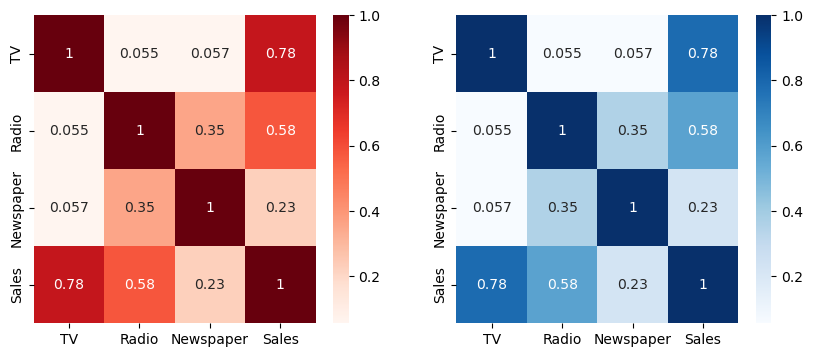

In [24]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

sns.heatmap(df.corr(),
            annot=True,
            cmap='Reds',
           ax=axes[0])

sns.heatmap(scaled_df.corr(),
            annot=True,
            cmap='Blues',
           ax=axes[1])

plt.show()

## With Normal Data

In [12]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 3.1740973539761037
R2 Score: 0.899438024100912


## with Scaled Data 

In [18]:
scaled_X = scaled_df[['TV', 'Radio', 'Newspaper']]
scaled_y = scaled_df['Sales']

In [19]:
scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(scaled_X, scaled_y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(scaled_X_train, scaled_y_train)

LinearRegression()

In [21]:
scaled_y_pred = model.predict(scaled_X_test)

In [22]:
print('Mean Squared Error:', mean_squared_error(scaled_y_test, scaled_y_pred))
print('R2 Score:', r2_score(scaled_y_test, scaled_y_pred))

Mean Squared Error: 0.11718701111820515
R2 Score: 0.899438024100912
